In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from collections import OrderedDict
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/My Drive/DMPA ENDSEM PROJECT/car_price.csv")
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [ ]:
#Dropping all the unknown and null values
print("Shape of the data frame before dropping:" + str(df.shape))
df2=df.dropna()
print("Shape of the new data frame after dropping:" + str(df2.shape))


Shape of the data frame before dropping:(8128, 13)
Shape of the new data frame after dropping:(7906, 13)


In [ ]:
#Dropping all the unknown and null values
print("Shape of the data frame before dropping:" + str(df.shape))
df2=df.dropna()
print("Shape of the new data frame after dropping:" + str(df2.shape))

Shape of the data frame before dropping:(8128, 13)
Shape of the new data frame after dropping:(7906, 13)


In [ ]:
df2['mileage']=df2['mileage'].apply(lambda x:float(x.split()[0]))
df2['engine']=df2['engine'].apply(lambda x: float(x.split()[0]))
df2['max_power']=df2['max_power'].apply(lambda x: float(x.split()[0]))

In [ ]:
df2


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [ ]:
 df2=df2.drop(columns='name')
 df2=df2.drop(columns='torque')

In [ ]:
print(df2['fuel'].unique())
print(df2['seller_type'].unique())
print(df2['transmission'].unique())
print(df2['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [ ]:
df2['fuel'].replace(['Diesel', 'Petrol' ,'LPG' ,'CNG'],[0,1,2,3],inplace=True)
df2['seller_type'].replace(['Individual' ,'Dealer', 'Trustmark Dealer'],[0,1,2],inplace=True)
df2['transmission'].replace(['Manual' ,'Automatic'],[0,1],inplace=True)
df2['owner'].replace(['First Owner' ,'Second Owner' ,'Third Owner', 'Fourth & Above Owner',
 'Test Drive Car'],[0,1,2,3,4],inplace=True)

In [ ]:
model = LinearRegression(fit_intercept=True)
Y = df2['selling_price'].values
X=df2
X=X.drop(columns='selling_price')
X=X.values.reshape(7906,10)
Y=Y.reshape(Y.size,1)
print(Y.shape)
print(X.shape)
x_train , x_test, y_train, y_test = train_test_split(X, Y, random_state=44)
x_train.shape
model.fit(x_train,y_train)

(7906, 1)
(7906, 10)


LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
error = (np.sum((y_test - y_pred)**2)/y_test.shape[0])**0.5
print(error)

425251.64618672157


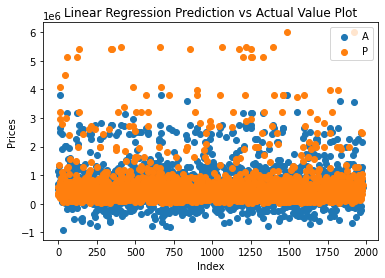

In [ ]:
index=[]
for i in range(len(y_pred)):
  index.append(i)

plt.scatter(index,y_pred)
plt.scatter(index,y_test)
plt.xlabel('Index')
plt.ylabel('Prices')
plt.title('Linear Regression Prediction vs Actual Value Plot')
plt.legend("AP")
plt.show()
